In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/kaggle/input/road-accident-statistics-in-bangladesh/road_accident_statistics.csv')

In [41]:
df.head(3)

,Year,Number of Accidents,Death,Number of Serious Injuries,Number of Minor Injuries,Number of Moderate Injuries,Number of Severe Injuries
0,1980,1500,1300,1200,400,200,100
1,1981,1450,1250,1150,380,190,95
2,1982,1400,1200,1100,360,180,90


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Year                         44 non-null     int64
 1   Number of Accidents          44 non-null     int64
 2   Death                        44 non-null     int64
 3   Number of Serious Injuries   44 non-null     int64
 4   Number of Minor Injuries     44 non-null     int64
 5   Number of Moderate Injuries  44 non-null     int64
 6   Number of Severe Injuries    44 non-null     int64
dtypes: int64(7)
memory usage: 2.5 KB


In [6]:
df.describe()

,Year,Number of Accidents,Death,Number of Serious Injuries,Number of Minor Injuries,Number of Moderate Injuries,Number of Severe Injuries
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,2001.500000,772.727273,613.636364,518.750000,138.272727,69.113636,34.522727
std,12.845233,358.688591,344.620390,337.015156,121.502486,60.777220,30.429093
min,1980.000000,200.000000,50.000000,25.000000,2.000000,1.000000,0.000000
25%,1990.750000,487.500000,337.500000,237.500000,17.500000,8.750000,4.500000
50%,2001.500000,750.000000,600.000000,500.000000,120.000000,60.000000,30.000000
75%,2012.250000,1012.500000,862.500000,762.500000,225.000000,112.500000,56.250000
max,2023.000000,1500.000000,1300.000000,1200.000000,400.000000,200.000000,100.000000


In [7]:
import matplotlib.pyplot as plt

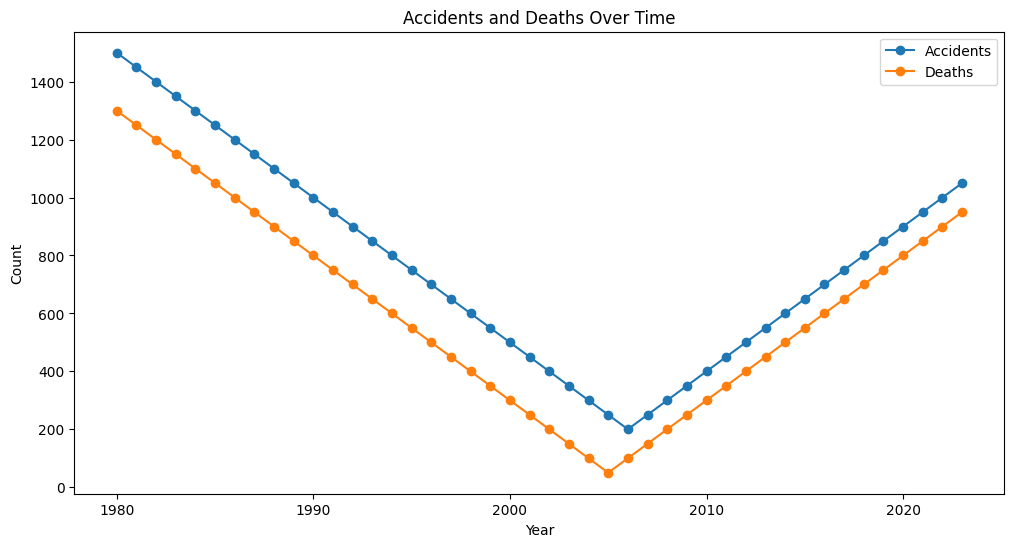

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["Number of Accidents"], marker="o", label="Accidents")
plt.plot(df["Year"], df["Death"], marker="o", label="Deaths")
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Accidents and Deaths Over Time")
plt.legend()
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression

In [28]:
# Model for Number of Accidents
X_accidents = df[["Year"]]
y_accidents = df["Number of Accidents"]
model_accidents = LinearRegression()
model_accidents.fit(X_accidents, y_accidents)

LinearRegression()

In [29]:
# Model for Deaths
X_deaths = df[["Year", "Number of Accidents"]]
y_deaths = df["Death"]
model_deaths = LinearRegression()
model_deaths.fit(X_deaths, y_deaths)

LinearRegression()

In [30]:
future_years = pd.DataFrame({"Year": range(2024, 2031)})

In [31]:
future_years

,Year
0,2024
1,2025
2,2026
3,2027
4,2028
5,2029
6,2030


In [32]:
# Predict Number of Accidents
future_years["Number of Accidents"] = model_accidents.predict(future_years[["Year"]])

In [33]:
future_years

,Year,Number of Accidents
0,2024,432.135307
1,2025,416.997886
2,2026,401.860465
3,2027,386.723044
4,2028,371.585624
5,2029,356.448203
6,2030,341.310782


In [34]:
# Predict Deaths (using predicted accidents as input)
future_years["Predicted Deaths"] = model_deaths.predict(future_years[["Year", "Number of Accidents"]])

In [35]:
future_years

,Year,Number of Accidents,Predicted Deaths
0,2024,432.135307,347.251586
1,2025,416.997886,335.412262
2,2026,401.860465,323.572939
3,2027,386.723044,311.733615
4,2028,371.585624,299.894292
5,2029,356.448203,288.054968
6,2030,341.310782,276.215645


In [36]:
# Round predictions to whole numbers
future_years["Number of Accidents"] = future_years["Number of Accidents"].round().astype(int)
future_years["Predicted Deaths"] = future_years["Predicted Deaths"].round().astype(int)

In [37]:
future_years

,Year,Number of Accidents,Predicted Deaths
0,2024,432,347
1,2025,417,335
2,2026,402,324
3,2027,387,312
4,2028,372,300
5,2029,356,288
6,2030,341,276


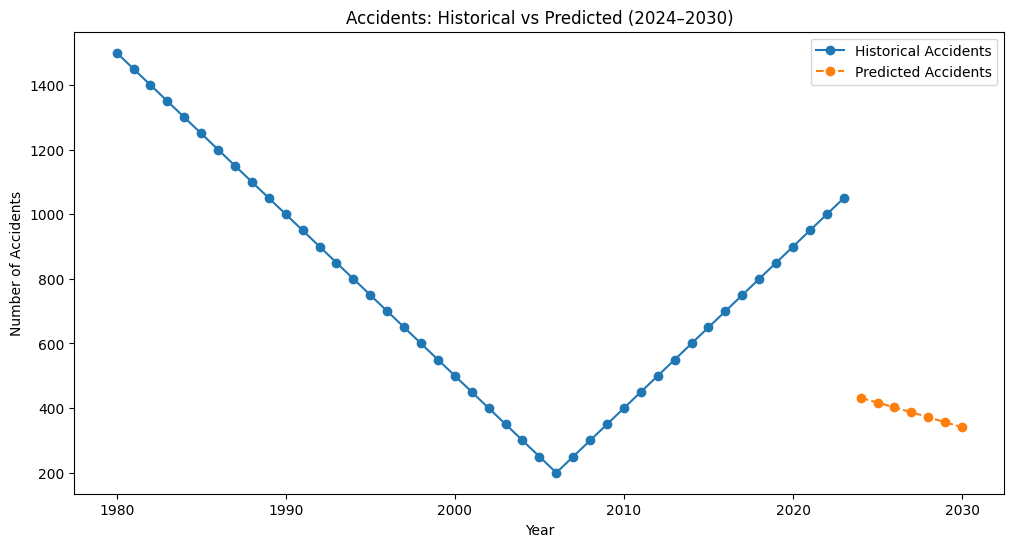

In [38]:
# Plot Predicted Accidents
plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["Number of Accidents"], label="Historical Accidents", marker="o")
plt.plot(future_years["Year"], future_years["Number of Accidents"], label="Predicted Accidents", marker="o", linestyle="--")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.title("Accidents: Historical vs Predicted (2024–2030)")
plt.legend()
plt.show()

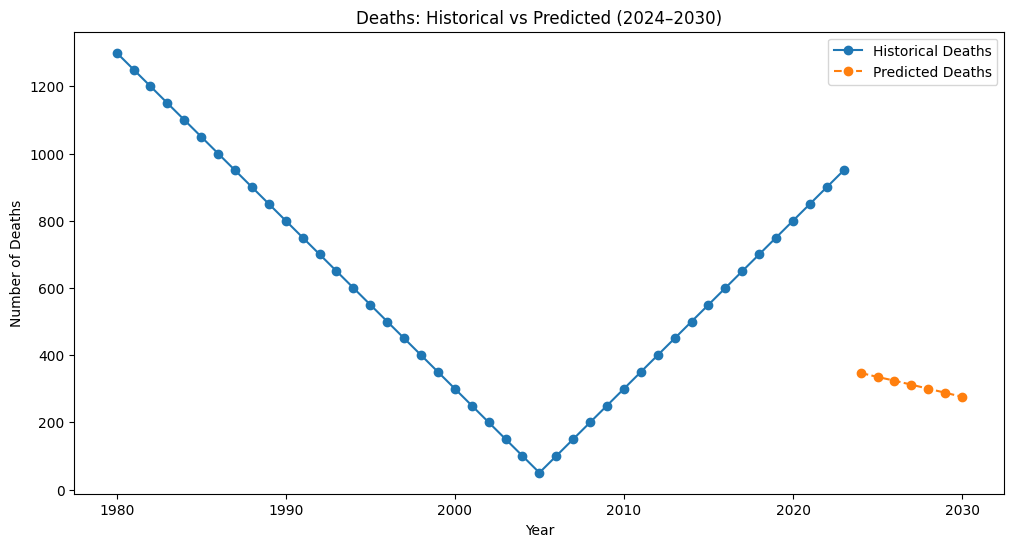

In [40]:
# Plot Predicted Deaths
plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["Death"], label="Historical Deaths", marker="o")
plt.plot(future_years["Year"], future_years["Predicted Deaths"], label="Predicted Deaths", marker="o", linestyle="--")
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.title("Deaths: Historical vs Predicted (2024–2030)")
plt.legend()
plt.show()